# Plot ACE2 expression vs Infectivity

This notebook plots pseudovirus infectivity in HEK293T clones expressing different levels of ACE2.

In [1]:
import os
import warnings

import pandas as pd
from plotnine import *

import yaml

In [2]:
warnings.simplefilter('ignore')

In [3]:
with open('config.yaml') as f:
    config = yaml.safe_load(f)

In [4]:
resultsdir=config['resultsdir']
os.makedirs(resultsdir, exist_ok=True)

In [5]:
df = pd.read_csv(config['ACE2_expression_df'])
df

,cells,MFI (mean),RLU/ul,relative MFI,relative RLU/ul
0,high,49768,307650.78400,1.000000,1.000000
1,medium,5130,160380.60100,0.103078,0.521307
2,low,2929,105836.51500,0.058853,0.344015
3,very low,1481,37566.13167,0.029758,0.122106
4,vero,1340,NaN,0.026925,NaN


In [6]:
cat_order = ['vero', 'very low', 'low', 'medium', 'high']
df['cells'] = pd.Categorical(df['cells'], categories=cat_order, ordered=True)

df

,cells,MFI (mean),RLU/ul,relative MFI,relative RLU/ul
0,high,49768,307650.78400,1.000000,1.000000
1,medium,5130,160380.60100,0.103078,0.521307
2,low,2929,105836.51500,0.058853,0.344015
3,very low,1481,37566.13167,0.029758,0.122106
4,vero,1340,NaN,0.026925,NaN


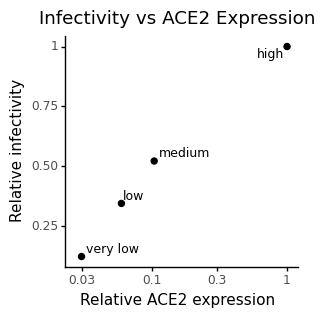

In [19]:
ACE2_infectivity=(
    ggplot(df) +
    aes(x="relative MFI", y="relative RLU/ul") +
    geom_point(size=2) +
    geom_text(
        mapping=aes(label='cells'),
        ha='left',
        adjust_text={'expand_points': (1.2, 1.2)},
        size=9
              ) +   
    theme_classic() +
    theme(figure_size=(3,3)) +
    labs(
        title = "Infectivity vs ACE2 Expression",
        x="Relative ACE2 expression",
        y="Relative infectivity") +
    scale_x_log10()
)

ACE2_infectivity.draw()
ACE2_infectivity.save('ACE2_infectivity.pdf')

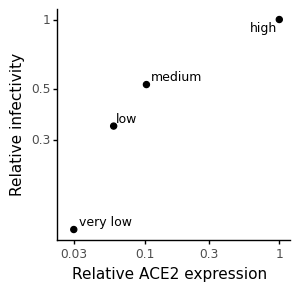

In [25]:
# version with Y axis as log scale
ACE2_infectivity_log=(
    ggplot(df)+
    aes(x="relative MFI", y="relative RLU/ul") +
    geom_point(size=2) +
    geom_text(
        mapping=aes(label='cells'),
        ha='left',
        adjust_text={'expand_points': (1.2, 1.2)},
        size=9
              ) +
    theme_classic()+
    theme(figure_size=(3,3)) +
    labs(
        #title = "Infectivity vs ACE2 Expression",
        x="Relative ACE2 expression",
        y="Relative infectivity"
         ) +
    scale_x_log10() +
    scale_y_log10()

                      )

ACE2_infectivity_log.draw()
ACE2_infectivity_log.save('ACE2_infectivity_log.pdf')

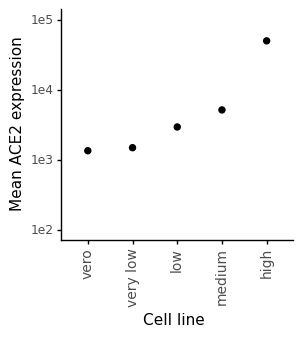

In [26]:
#ACE2 expression plot for figure 1
ACE2_expression=(
    ggplot(df)+
    aes(x="cells", y="MFI (mean)") +
    geom_point(size=2) +
    theme_classic()+
    theme(figure_size=(3,3),
          axis_text_x=element_text(size=10, angle=90)
          )+
    scale_y_log10(limits=[1,1.1e6])+
    xlab('Cell line') +
    scale_y_log10(limits=[1e2,1e5]) +
    labs(y ='Mean ACE2 expression')
)

ACE2_expression.draw()
ACE2_expression.save('ACE2_expression.pdf')